<a href="https://colab.research.google.com/github/mafaldasalomao/pavic_treinamento_ml/blob/main/PAVIC_ML_14_PT_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 19: Geração de novas imagens com GANs

## Etapa 1: Importação das bibliotecas

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
import torchvision.transforms as transforms
torch.__version__

'1.4.0'

In [ ]:
torch.manual_seed(123)

## Etapa 2: Base de dados

In [ ]:
transform = transforms.ToTensor()
train = datasets.MNIST(root = '.', train = True, download = True, 
                       transform = transform)
train_loader = torch.utils.data.DataLoader(train, batch_size = 256)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


## Etapa 3: Construção do gerador

In [ ]:
class gerador(nn.Module):
  def __init__(self):
    super().__init__()

    # 100 -> 32 -> 64 -> 128 -> 784
    self.dense0 = nn.Linear(100, 32)
    self.dense1 = nn.Linear(32, 64)
    self.dense2 = nn.Linear(64, 128)
    self.dense3 = nn.Linear(128, 784)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = torch.tanh(self.dense3(X))
    X = X.view(X.shape[0], 28, 28)
    return X

## Etapa 4: Construção do discriminador

In [ ]:
class discriminador(nn.Module):
  def __init__(self):
    super().__init__()

    # 784 -> 128 -> 64 -> 32 -> 1
    self.dense0 = nn.Linear(784, 128)
    self.dense1 = nn.Linear(128, 64)
    self.dense2 = nn.Linear(64, 32)
    self.dense3 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.3)

  def forward(self, X):
    X = X.view(X.shape[0], 28 * 28)
    X = self.dropout(F.leaky_relu(self.dense0(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense1(X), 0.2))
    X = self.dropout(F.leaky_relu(self.dense2(X), 0.2))
    X = self.dense3(X)
    return X

## Etapa 5: Criação dos objetos

In [ ]:
G = gerador()
D = discriminador()

In [ ]:
G_optimizer = optim.Adam(G.parameters(), lr = 0.002)
D_optimizer = optim.Adam(D.parameters(), lr = 0.002)

In [ ]:
criterion = nn.BCEWithLogitsLoss()

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda')

In [ ]:
G.to(device)

gerador(
  (dense0): Linear(in_features=100, out_features=32, bias=True)
  (dense1): Linear(in_features=32, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=128, bias=True)
  (dense3): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

In [ ]:
D.to(device)

discriminador(
  (dense0): Linear(in_features=784, out_features=128, bias=True)
  (dense1): Linear(in_features=128, out_features=64, bias=True)
  (dense2): Linear(in_features=64, out_features=32, bias=True)
  (dense3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

## Etapa 6: Treinamento do modelo

ÉPOCA 001 finalizada: custo discriminador 0.749428 - custo gerador 3.704034      


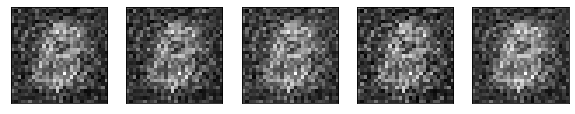

ÉPOCA 002 finalizada: custo discriminador 0.924465 - custo gerador 4.317544      


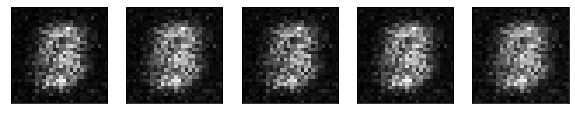

ÉPOCA 003 finalizada: custo discriminador 1.049086 - custo gerador 3.132647      


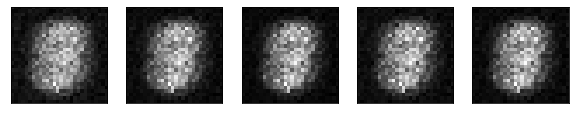

ÉPOCA 004 finalizada: custo discriminador 1.077437 - custo gerador 2.520545      


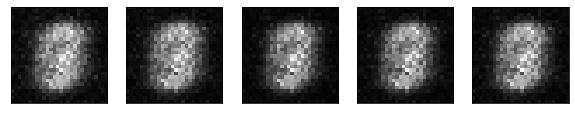

ÉPOCA 005 finalizada: custo discriminador 1.220808 - custo gerador 1.523255      


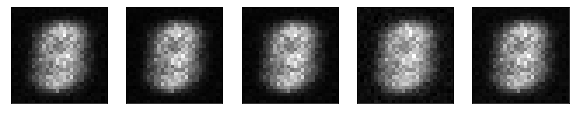

ÉPOCA 006 finalizada: custo discriminador 1.246993 - custo gerador 1.356612      


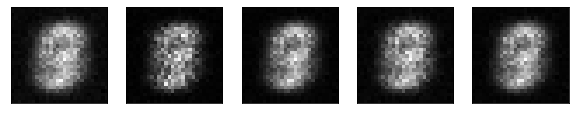

ÉPOCA 007 finalizada: custo discriminador 1.197008 - custo gerador 1.547413      


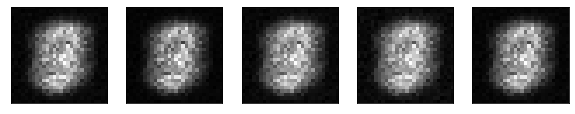

ÉPOCA 008 finalizada: custo discriminador 1.181484 - custo gerador 1.533668      


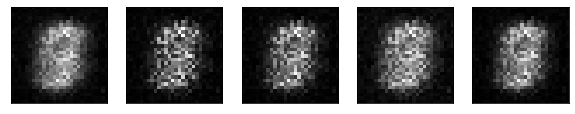

ÉPOCA 009 finalizada: custo discriminador 1.012783 - custo gerador 1.502984      


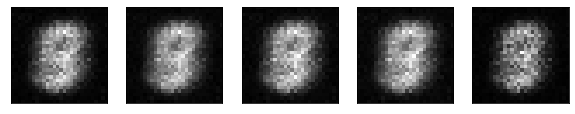

ÉPOCA 010 finalizada: custo discriminador 0.872662 - custo gerador 2.222330      


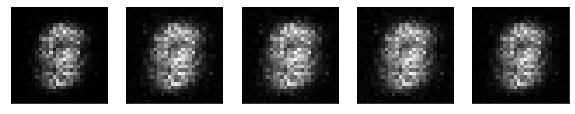

ÉPOCA 011 finalizada: custo discriminador 0.829392 - custo gerador 2.565511      


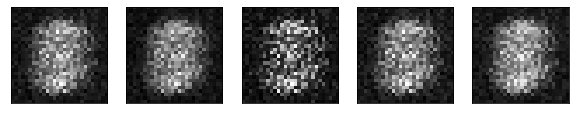

ÉPOCA 012 finalizada: custo discriminador 0.974466 - custo gerador 2.189748      


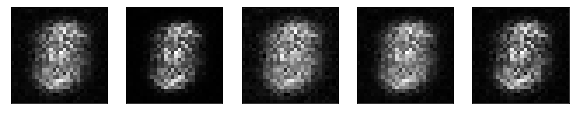

ÉPOCA 013 finalizada: custo discriminador 0.994296 - custo gerador 2.315923      


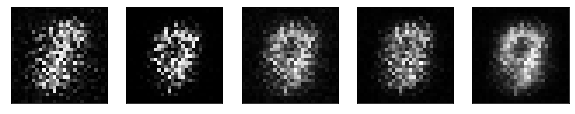

ÉPOCA 014 finalizada: custo discriminador 1.085706 - custo gerador 1.880199      


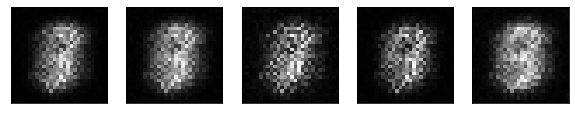

ÉPOCA 015 finalizada: custo discriminador 1.114411 - custo gerador 1.762109      


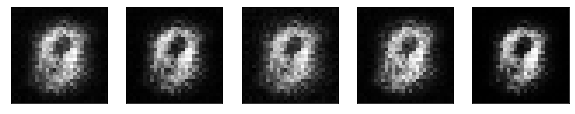

ÉPOCA 016 finalizada: custo discriminador 1.137099 - custo gerador 1.550784      


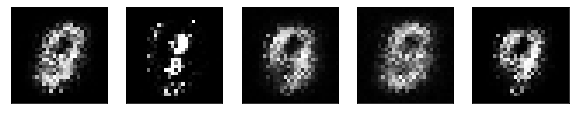

ÉPOCA 017 finalizada: custo discriminador 1.129982 - custo gerador 1.763092      


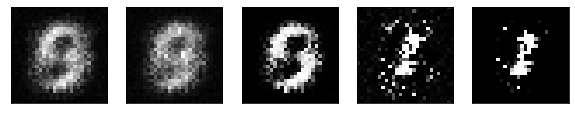

ÉPOCA 018 finalizada: custo discriminador 1.029983 - custo gerador 1.641957      


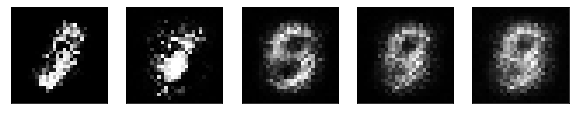

ÉPOCA 019 finalizada: custo discriminador 1.057180 - custo gerador 1.762933      


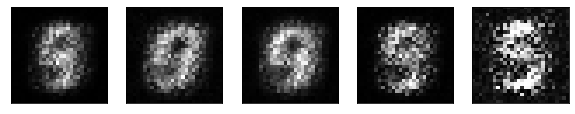

ÉPOCA 020 finalizada: custo discriminador 1.081847 - custo gerador 1.773443      


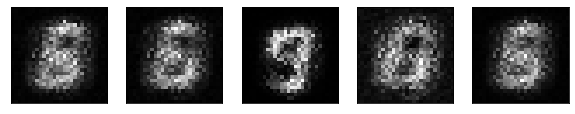

ÉPOCA 021 finalizada: custo discriminador 1.097933 - custo gerador 1.731010      


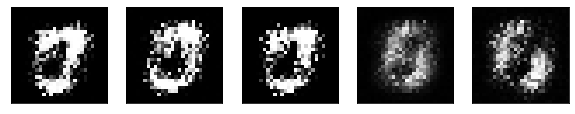

ÉPOCA 022 finalizada: custo discriminador 1.084088 - custo gerador 1.705442      


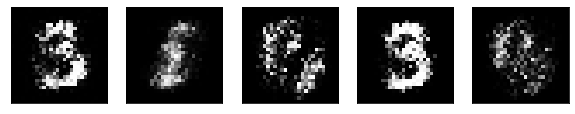

ÉPOCA 023 finalizada: custo discriminador 1.124874 - custo gerador 1.634383      


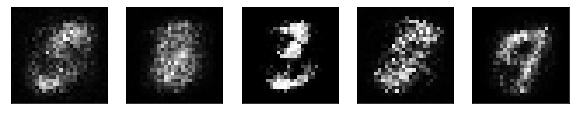

ÉPOCA 024 finalizada: custo discriminador 1.149471 - custo gerador 1.463136      


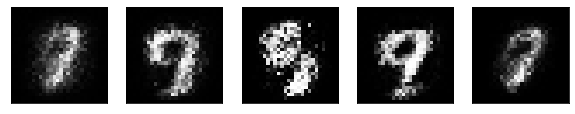

ÉPOCA 025 finalizada: custo discriminador 1.068594 - custo gerador 1.769786      


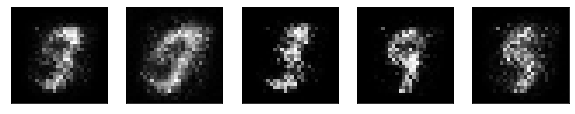

ÉPOCA 026 finalizada: custo discriminador 1.115339 - custo gerador 1.643080      


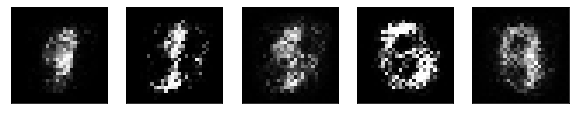

ÉPOCA 027 finalizada: custo discriminador 1.124436 - custo gerador 1.545747      


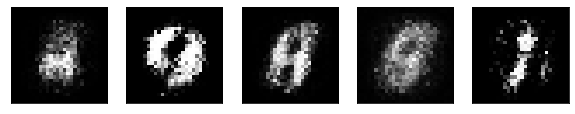

ÉPOCA 028 finalizada: custo discriminador 1.194820 - custo gerador 1.348095      


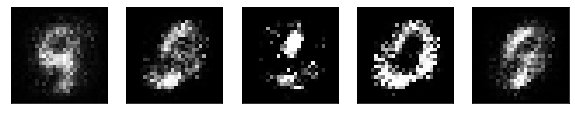

ÉPOCA 029 finalizada: custo discriminador 1.158253 - custo gerador 1.434465      


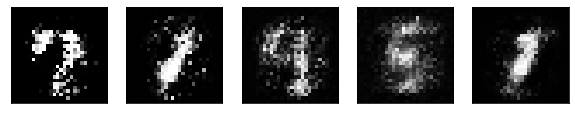

ÉPOCA 030 finalizada: custo discriminador 1.141983 - custo gerador 1.487279      


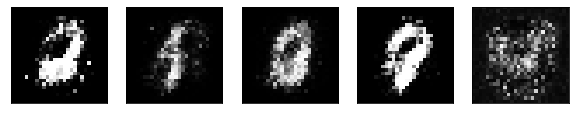

ÉPOCA 031 finalizada: custo discriminador 1.129129 - custo gerador 1.522994      


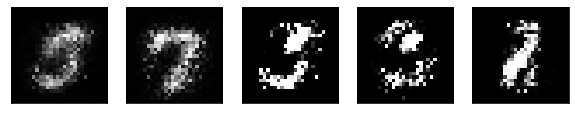

ÉPOCA 032 finalizada: custo discriminador 1.177305 - custo gerador 1.493587      


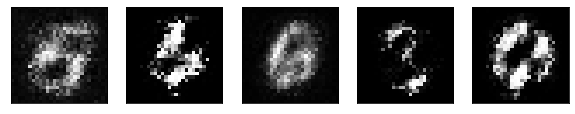

ÉPOCA 033 finalizada: custo discriminador 1.146948 - custo gerador 1.386538      


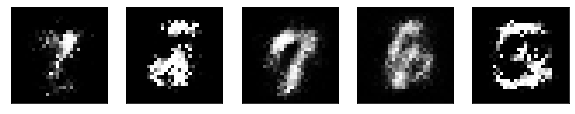

ÉPOCA 034 finalizada: custo discriminador 1.182395 - custo gerador 1.385178      


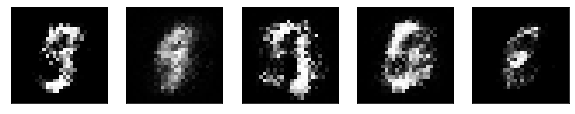

ÉPOCA 035 finalizada: custo discriminador 1.215029 - custo gerador 1.278763      


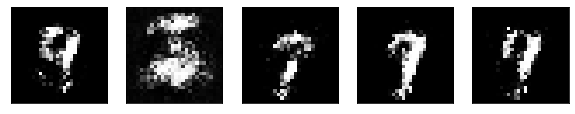

ÉPOCA 036 finalizada: custo discriminador 1.192820 - custo gerador 1.276902      


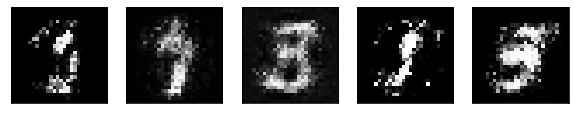

ÉPOCA 037 finalizada: custo discriminador 1.198679 - custo gerador 1.288905      


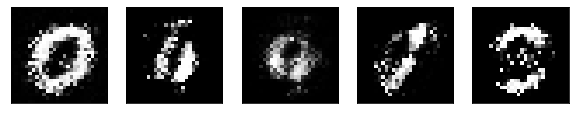

ÉPOCA 038 finalizada: custo discriminador 1.200377 - custo gerador 1.341460      


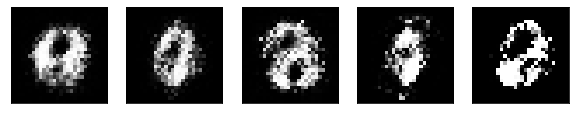

ÉPOCA 039 finalizada: custo discriminador 1.221102 - custo gerador 1.234932      


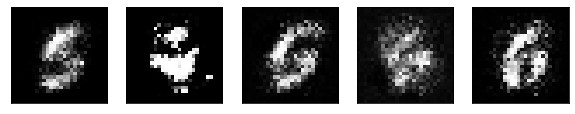

ÉPOCA 040 finalizada: custo discriminador 1.196548 - custo gerador 1.306742      


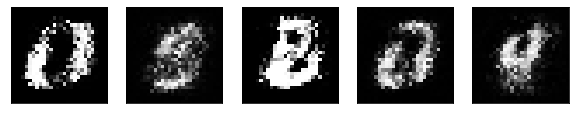

ÉPOCA 041 finalizada: custo discriminador 1.226318 - custo gerador 1.271465      


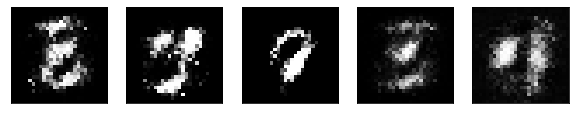

ÉPOCA 042 finalizada: custo discriminador 1.227901 - custo gerador 1.258651      


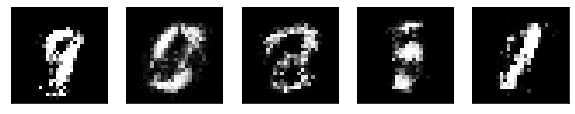

ÉPOCA 043 finalizada: custo discriminador 1.204289 - custo gerador 1.232868      


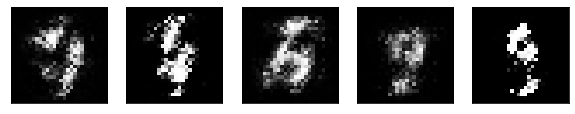

ÉPOCA 044 finalizada: custo discriminador 1.208182 - custo gerador 1.255358      


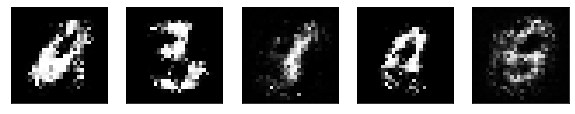

ÉPOCA 045 finalizada: custo discriminador 1.220073 - custo gerador 1.194336      


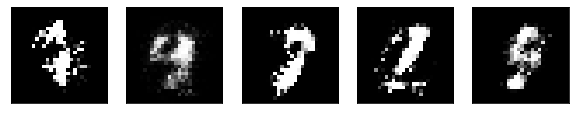

ÉPOCA 046 finalizada: custo discriminador 1.241470 - custo gerador 1.198287      


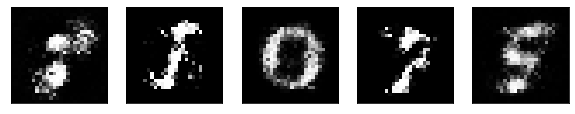

ÉPOCA 047 finalizada: custo discriminador 1.234332 - custo gerador 1.166396      


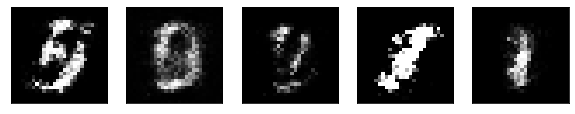

ÉPOCA 048 finalizada: custo discriminador 1.239204 - custo gerador 1.181820      


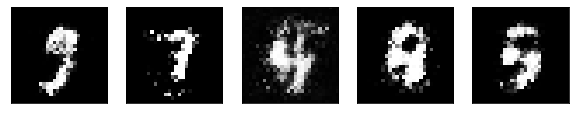

ÉPOCA 049 finalizada: custo discriminador 1.222668 - custo gerador 1.167619      


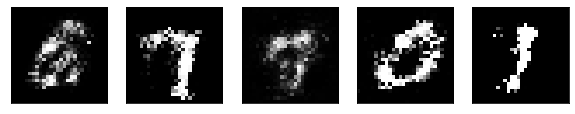

ÉPOCA 050 finalizada: custo discriminador 1.263717 - custo gerador 1.121154      


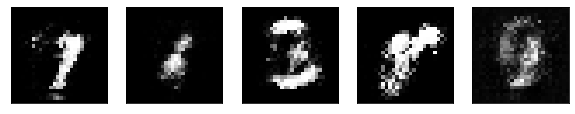

ÉPOCA 051 finalizada: custo discriminador 1.244755 - custo gerador 1.135218      


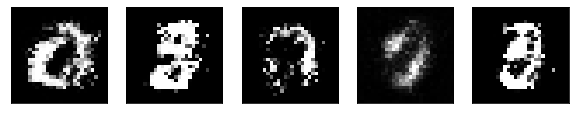

ÉPOCA 052 finalizada: custo discriminador 1.265427 - custo gerador 1.098399      


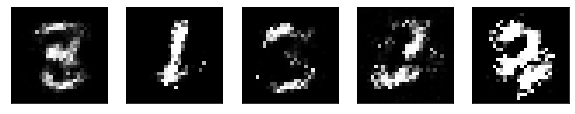

ÉPOCA 053 finalizada: custo discriminador 1.245245 - custo gerador 1.117890      


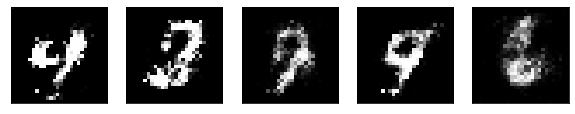

ÉPOCA 054 finalizada: custo discriminador 1.269958 - custo gerador 1.076382      


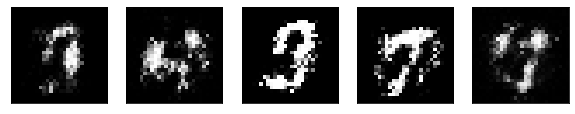

ÉPOCA 055 finalizada: custo discriminador 1.263129 - custo gerador 1.108029      


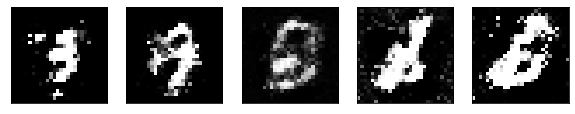

ÉPOCA 056 finalizada: custo discriminador 1.276615 - custo gerador 1.068292      


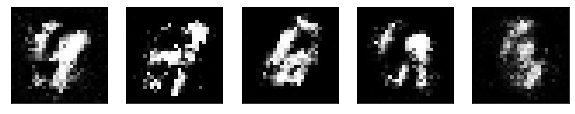

ÉPOCA 057 finalizada: custo discriminador 1.260585 - custo gerador 1.102587      


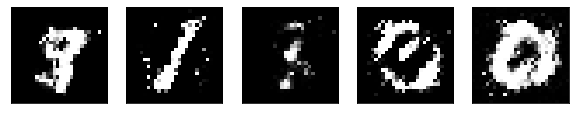

ÉPOCA 058 finalizada: custo discriminador 1.240747 - custo gerador 1.166752      


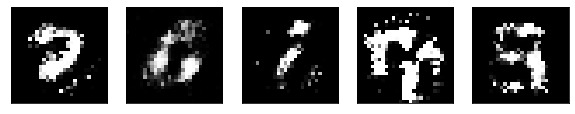

ÉPOCA 059 finalizada: custo discriminador 1.243480 - custo gerador 1.179784      


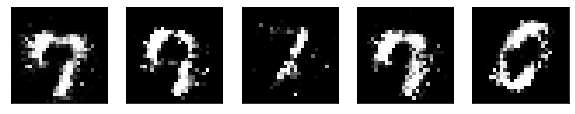

ÉPOCA 060 finalizada: custo discriminador 1.230922 - custo gerador 1.222423      


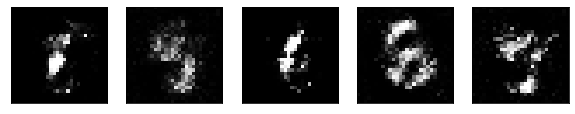

ÉPOCA 061 finalizada: custo discriminador 1.217888 - custo gerador 1.236734      


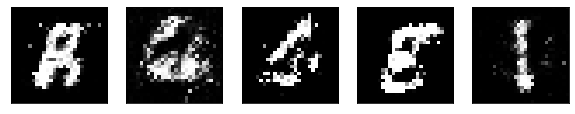

ÉPOCA 062 finalizada: custo discriminador 1.189832 - custo gerador 1.337876      


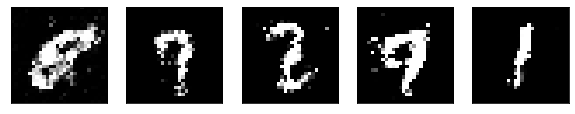

ÉPOCA 063 finalizada: custo discriminador 1.198955 - custo gerador 1.323220      


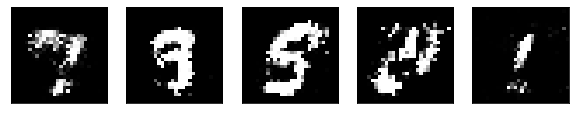

ÉPOCA 064 finalizada: custo discriminador 1.194678 - custo gerador 1.291100      


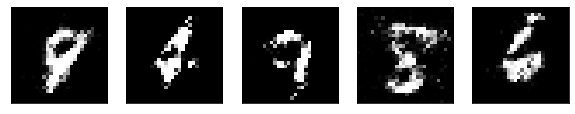

ÉPOCA 065 finalizada: custo discriminador 1.233839 - custo gerador 1.192384      


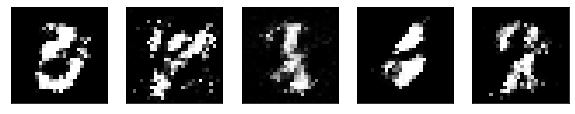

ÉPOCA 066 finalizada: custo discriminador 1.220133 - custo gerador 1.186184      


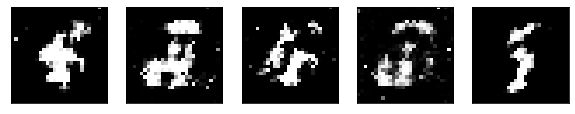

ÉPOCA 067 finalizada: custo discriminador 1.230737 - custo gerador 1.203851      


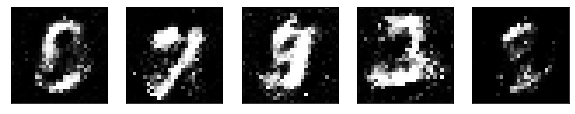

ÉPOCA 068 finalizada: custo discriminador 1.215872 - custo gerador 1.217629      


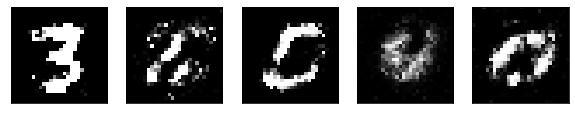

ÉPOCA 069 finalizada: custo discriminador 1.237493 - custo gerador 1.146421      


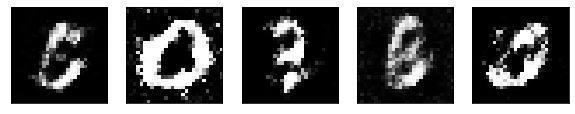

ÉPOCA 070 finalizada: custo discriminador 1.248626 - custo gerador 1.111073      


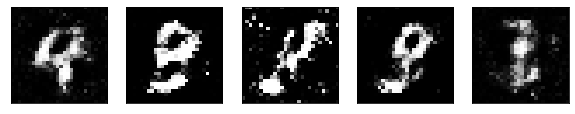

ÉPOCA 071 finalizada: custo discriminador 1.263389 - custo gerador 1.080491      


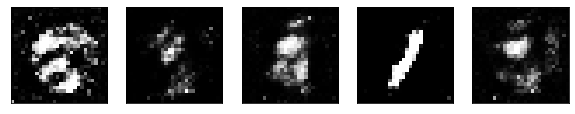

ÉPOCA 072 finalizada: custo discriminador 1.259961 - custo gerador 1.130725      


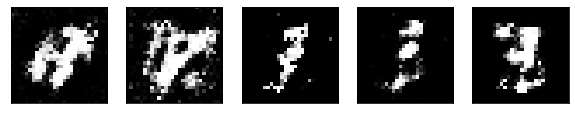

ÉPOCA 073 finalizada: custo discriminador 1.249542 - custo gerador 1.126270      


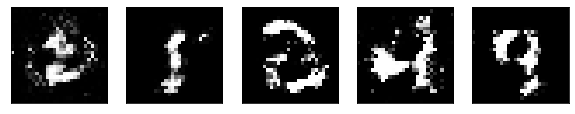

ÉPOCA 074 finalizada: custo discriminador 1.249361 - custo gerador 1.137752      


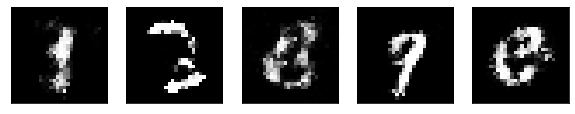

ÉPOCA 075 finalizada: custo discriminador 1.258681 - custo gerador 1.112341      


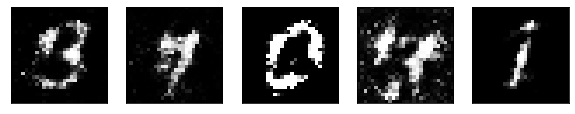

ÉPOCA 076 finalizada: custo discriminador 1.248185 - custo gerador 1.143662      


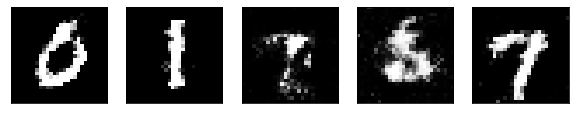

ÉPOCA 077 finalizada: custo discriminador 1.255684 - custo gerador 1.121069      


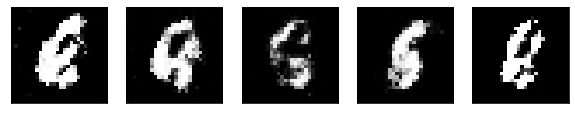

ÉPOCA 078 finalizada: custo discriminador 1.239833 - custo gerador 1.207207      


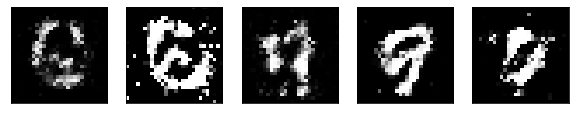

ÉPOCA 079 finalizada: custo discriminador 1.230260 - custo gerador 1.193765      


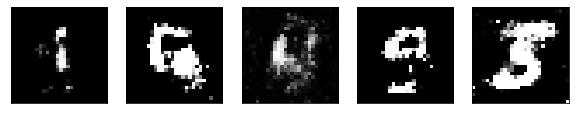

ÉPOCA 080 finalizada: custo discriminador 1.258292 - custo gerador 1.131376      


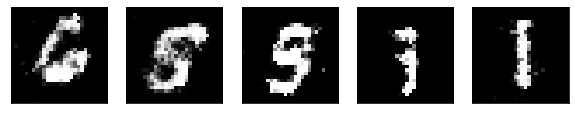

ÉPOCA 081 finalizada: custo discriminador 1.265010 - custo gerador 1.118362      


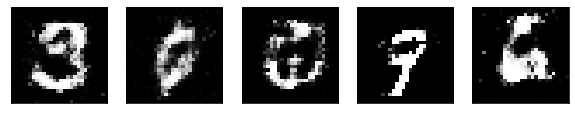

ÉPOCA 082 finalizada: custo discriminador 1.253439 - custo gerador 1.146530      


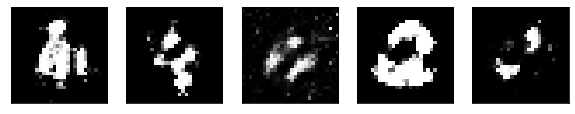

ÉPOCA 083 finalizada: custo discriminador 1.255631 - custo gerador 1.129032      


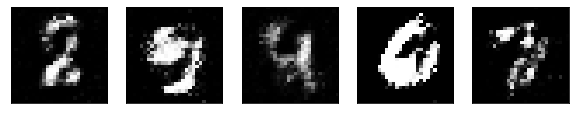

ÉPOCA 084 finalizada: custo discriminador 1.254505 - custo gerador 1.120352      


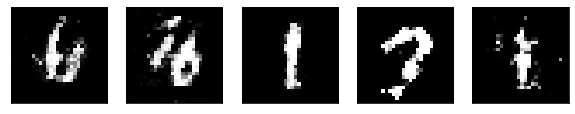

ÉPOCA 085 finalizada: custo discriminador 1.269839 - custo gerador 1.062866      


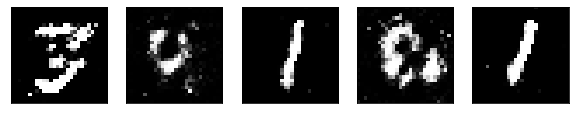

ÉPOCA 086 finalizada: custo discriminador 1.263439 - custo gerador 1.082944      


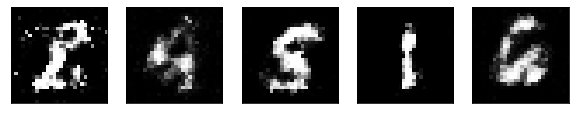

ÉPOCA 087 finalizada: custo discriminador 1.268385 - custo gerador 1.092890      


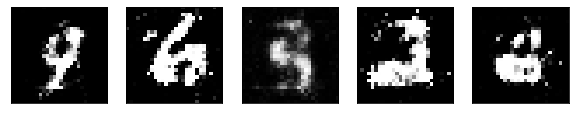

ÉPOCA 088 finalizada: custo discriminador 1.275597 - custo gerador 1.096285      


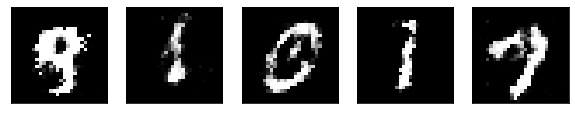

ÉPOCA 089 finalizada: custo discriminador 1.263778 - custo gerador 1.126932      


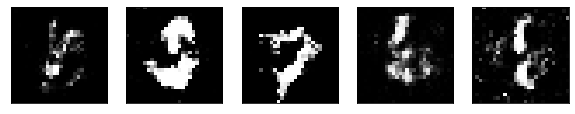

ÉPOCA 090 finalizada: custo discriminador 1.256225 - custo gerador 1.128095      


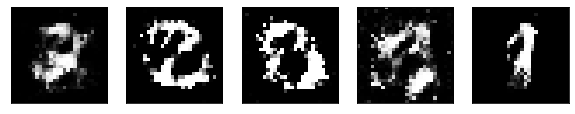

ÉPOCA 091 finalizada: custo discriminador 1.253562 - custo gerador 1.122580      


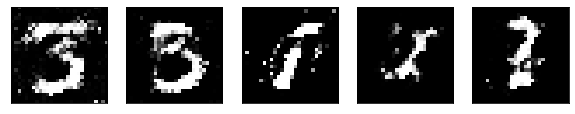

ÉPOCA 092 finalizada: custo discriminador 1.249830 - custo gerador 1.115305      


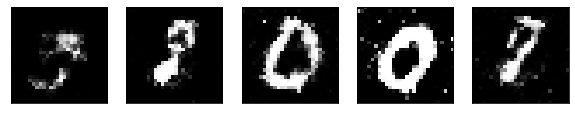

ÉPOCA 093 finalizada: custo discriminador 1.265717 - custo gerador 1.071188      


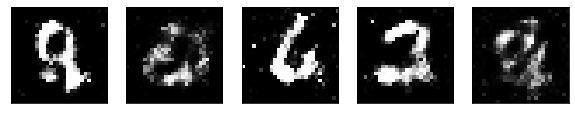

ÉPOCA 094 finalizada: custo discriminador 1.256406 - custo gerador 1.096987      


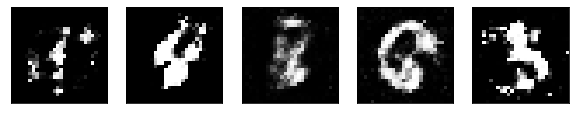

ÉPOCA 095 finalizada: custo discriminador 1.274732 - custo gerador 1.089015      


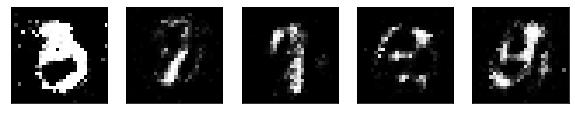

ÉPOCA 096 finalizada: custo discriminador 1.267454 - custo gerador 1.089275      


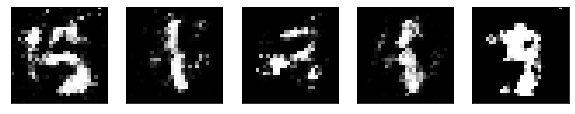

ÉPOCA 097 finalizada: custo discriminador 1.263748 - custo gerador 1.069549      


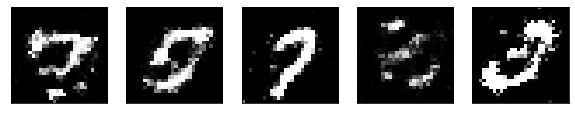

ÉPOCA 098 finalizada: custo discriminador 1.270945 - custo gerador 1.077765      


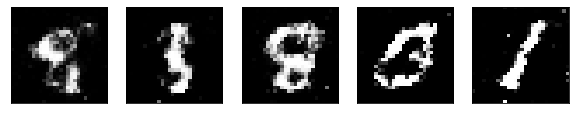

ÉPOCA 099 finalizada: custo discriminador 1.273033 - custo gerador 1.105603      


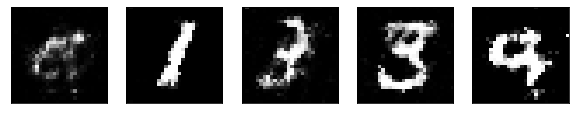

ÉPOCA 100 finalizada: custo discriminador 1.261822 - custo gerador 1.081205      


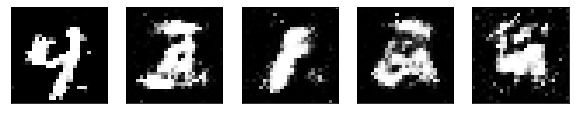

In [ ]:
for epoch in range(100):
    D_running_loss = 0
    G_running_loss = 0
    
    for i, (imagens_reais, _) in enumerate(train_loader):
        batch_size = imagens_reais.size(0)
        imagens_reais = imagens_reais * 2 - 1
        imagens_reais = imagens_reais.to(device)

        # Treinamento do gerador
        G_optimizer.zero_grad()
        ruido = np.random.uniform(low=-1., high=1., size=(batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.ones(batch_size).to(device)
        G_loss = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)
        G_loss.backward()
        G_optimizer.step()

        # Treinamento do discriminador
        D_optimizer.zero_grad()
        outputs_reais = D.forward(imagens_reais)
        labels_reais = (torch.ones(batch_size) * 0.9).to(device)
        D_loss_reais = criterion(outputs_reais.view(*labels_reais.shape), labels_reais)

        ruido = np.random.uniform(-1., 1., (batch_size, 100))
        ruido = torch.from_numpy(ruido).float().to(device)
        imagens_falsas = G.forward(ruido)
        outputs_falsas = D.forward(imagens_falsas)
        labels_falsas = torch.zeros(batch_size).to(device)
        D_loss_falsas = criterion(outputs_falsas.view(*labels_falsas.shape), labels_falsas)

        D_loss = D_loss_reais + D_loss_falsas
        D_loss.backward()
        D_optimizer.step()

        D_running_loss += D_loss.item()
        G_running_loss += G_loss.item()

        # Imprimindo os dados referentes a esse batch   
        print('\rÉpoca {:03d} - Loop {:3d} de {:3d}: custo discriminador {:03.5f} - custo gerador {:03.5f}'.format(epoch + 1, i + 1, len(train_loader), D_loss.item(), G_loss.item()), end = '\r')
  
    # Imprimindo os dados referentes a essa época
    D_running_loss /= len(train_loader)
    G_running_loss /= len(train_loader)
    print('ÉPOCA {:03d} finalizada: custo discriminador {:03.6f} - custo gerador {:03.6f}      '.format(epoch + 1, D_running_loss, G_running_loss))

    fig, ax = plt.subplots(1, 5, figsize=(10,5))
    for i in range(5):
      ax[i].imshow(imagens_falsas.cpu().detach().numpy()[i].reshape(28, 28), cmap='gray')
      ax[i].xaxis.set_visible(False)
      ax[i].yaxis.set_visible(False)
    plt.show()


## Etapa 7: Criação de novas imagens

In [ ]:
ruido = np.random.uniform(-1., 1., (20, 100))

In [ ]:
ruido[1]

array([-0.50455962,  0.04403295, -0.36247567, -0.70664304, -0.20340559,
        0.27379749,  0.46358184, -0.50405804,  0.70215872,  0.31335112,
       -0.13589194, -0.24399519, -0.74922853,  0.75002297, -0.57017128,
        0.19917697,  0.86093823, -0.40784782,  0.81113044,  0.52990976,
       -0.27708061,  0.57069991, -0.80457995, -0.75122518, -0.11227347,
       -0.36847526, -0.93101812,  0.70244096, -0.94195139, -0.94769922,
        0.79568975,  0.67354099, -0.89774369,  0.05469877,  0.47824572,
       -0.35577249, -0.34852692,  0.65770519, -0.04609337,  0.6147461 ,
       -0.04810942,  0.15869532, -0.1371803 , -0.39937592,  0.41853814,
       -0.14089068, -0.13093295, -0.22349509, -0.94041805,  0.45848144,
       -0.48819818,  0.70645829,  0.29095024,  0.62845287,  0.19862184,
       -0.49117396, -0.25774161, -0.90520118,  0.29706535,  0.66735609,
       -0.75092515,  0.92219855, -0.43785371,  0.99542421,  0.16733054,
        0.57496854, -0.46080036,  0.67994188, -0.36016659,  0.15

In [ ]:
ruido = torch.from_numpy(ruido).float().to(device)

In [ ]:
type(ruido)

torch.Tensor

In [ ]:
G.eval()
previsao = G.forward(ruido)

In [ ]:
previsao = previsao.cpu().detach().numpy()

In [ ]:
previsao.shape[0]

20

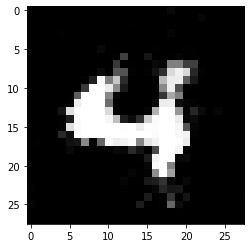

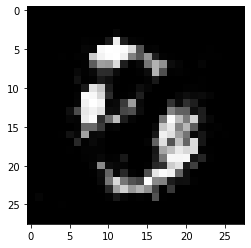

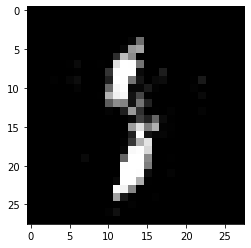

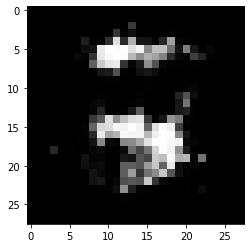

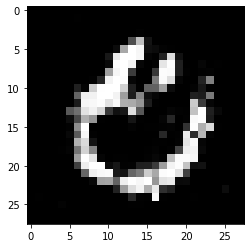

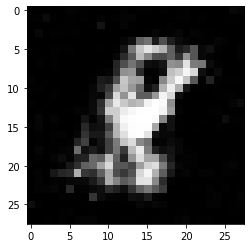

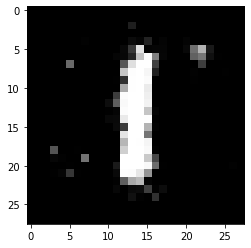

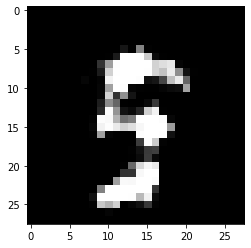

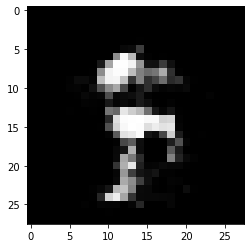

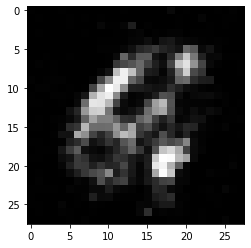

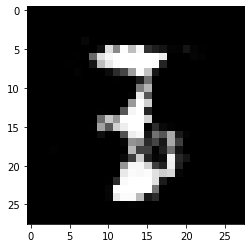

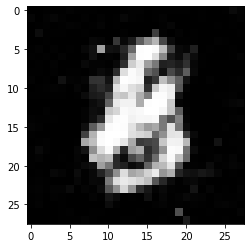

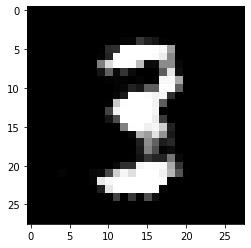

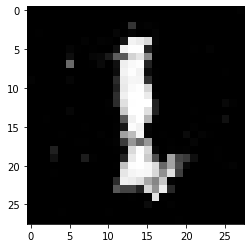

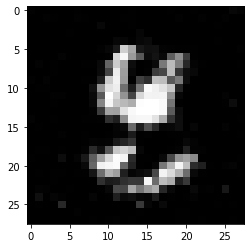

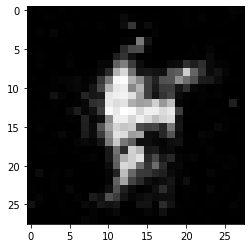

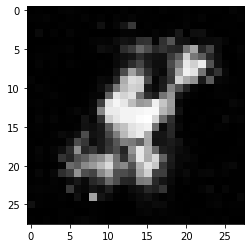

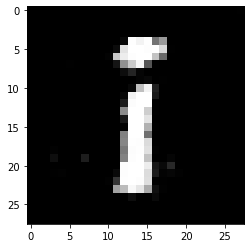

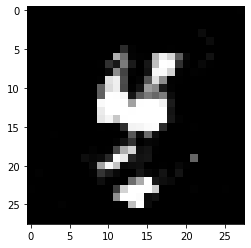

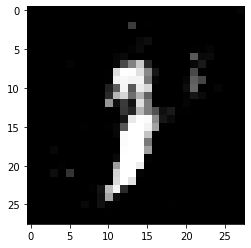

In [ ]:
for i in range(previsao.shape[0]):
  plt.imshow(previsao[i, :].squeeze(), cmap='gray')
  plt.show()